### Microsoft Stock Forecasting with LSTM

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("MSFT.csv")

In [33]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9513,2023-12-11,368.480011,371.600006,366.100006,371.299988,371.299988,27708800
9514,2023-12-12,370.850006,374.420013,370.459991,374.380005,374.380005,24838300
9515,2023-12-13,376.019989,377.640015,370.769989,374.369995,374.369995,30955500
9516,2023-12-14,373.309998,373.760010,364.130005,365.929993,365.929993,43277500


In [34]:
df = df[['Date','Close']]

In [35]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9513,2023-12-11,371.299988
9514,2023-12-12,374.380005
9515,2023-12-13,374.369995
9516,2023-12-14,365.929993


In [36]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9513    2023-12-11
9514    2023-12-12
9515    2023-12-13
9516    2023-12-14
9517    2023-12-15
Name: Date, Length: 9518, dtype: object

In [37]:
import datetime
# Return associated datetime for string
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    
    return datetime.datetime(year=year,month=month,day=day)

# Test our function
datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [38]:
# Convert all Date string to date_objects
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_54413/755263858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9513   2023-12-11
9514   2023-12-12
9515   2023-12-13
9516   2023-12-14
9517   2023-12-15
Name: Date, Length: 9518, dtype: datetime64[ns]

In [39]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9513,2023-12-11,371.299988
9514,2023-12-12,374.380005
9515,2023-12-13,374.369995
9516,2023-12-14,365.929993


In [40]:
# Removing index and make the date column as index
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-12-11,371.299988
2023-12-12,374.380005
2023-12-13,374.369995


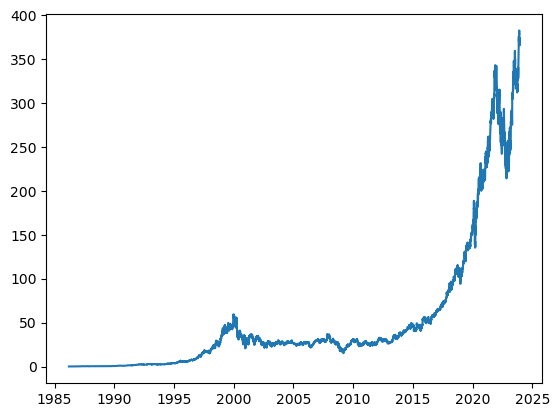

In [41]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [42]:
# Convert into a supervised learning problem
import numpy as np
# Converting a date into getting us 3 previous values and what it actually was
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2001-03-25', 
                                '2023-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2001-03-25,26.343750,25.031250,27.000000,28.281250
1,2001-03-27,27.000000,28.281250,28.031250,29.125000
2,2001-03-28,28.281250,28.031250,29.125000,27.781250
3,2001-03-29,28.031250,29.125000,27.781250,27.687500
4,2001-03-30,29.125000,27.781250,27.687500,27.343750
...,...,...,...,...,...
5529,2023-03-17,260.790009,265.440002,276.200012,279.429993
5530,2023-03-20,265.440002,276.200012,279.429993,272.230011
5531,2023-03-21,276.200012,279.429993,272.230011,273.779999
5532,2023-03-22,279.429993,272.230011,273.779999,272.290009


In [43]:
# Convert into numpy array
def windowed_df_to_date_X_y(windowed_dataframe):
    # Convert whole dataframe into numpy array
    df_As_np = windowed_dataframe.to_numpy()
    dates = df_As_np[:,0]
    
    # Getting the input matrix
    middle_matrix = df_As_np[:,1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))
    
    y = df_As_np[:,-1]
    
    return dates,X.astype(np.float32), y.astype(np.float32)

dates ,X,y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((5534,), (5534, 3, 1), (5534,))

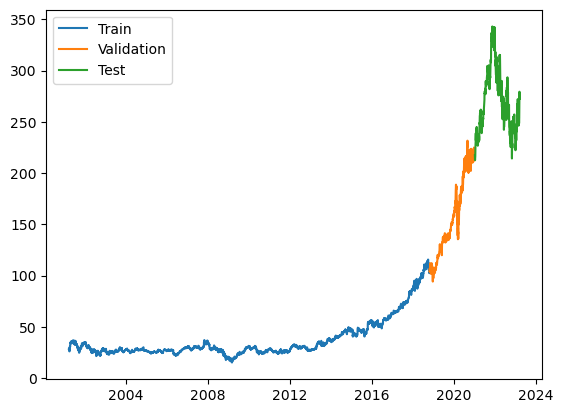

In [44]:
# Split data into train, validation and testing partitions
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train,y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                   layers.LSTM(64),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
139/139 [==============================] - 2s 4ms/step - loss: 647.3632 - mean_absolute_error: 17.1749 - val_loss: 8672.9092 - val_mean_absolute_error: 84.7298
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 5.9495 - mean_absolute_error: 0.8444 - val_loss: 3928.3875 - val_mean_absolute_error: 50.2730
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.7291 - mean_absolute_error: 0.5431 - val_loss: 3446.7859 - val_mean_absolute_error: 45.9633
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6590 - mean_absolute_error: 0.5327 - val_loss: 3263.4851 - val_mean_absolute_error: 44.2753
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6158 - mean_absolute_error: 0.5235 - val_loss: 3170.9558 - val_mean_absolute_error: 43.4689
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5095 - mean_absolute_error: 0.4857 - val_loss: 3085.6621 - val_mean_absolut

139/139 [==============================] - 0s 2ms/step - loss: 0.4940 - mean_absolute_error: 0.4763 - val_loss: 2907.3735 - val_mean_absolute_error: 41.0135
Epoch 50/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5706 - mean_absolute_error: 0.5251 - val_loss: 2897.7898 - val_mean_absolute_error: 40.9519
Epoch 51/100
139/139 [==============================] - 1s 4ms/step - loss: 0.6230 - mean_absolute_error: 0.5675 - val_loss: 2930.6912 - val_mean_absolute_error: 41.2937
Epoch 52/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5577 - mean_absolute_error: 0.5135 - val_loss: 2930.7126 - val_mean_absolute_error: 41.4342
Epoch 53/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5480 - mean_absolute_error: 0.5047 - val_loss: 2943.3623 - val_mean_absolute_error: 41.5386
Epoch 54/100
139/139 [==============================] - 0s 2ms/step - loss: 0.6210 - mean_absolute_error: 0.5499 - val_loss: 2904.5881 - val_mean_absolute_error: 4

139/139 [==============================] - 0s 2ms/step - loss: 0.5702 - mean_absolute_error: 0.5225 - val_loss: 3031.6079 - val_mean_absolute_error: 42.2595
Epoch 98/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5096 - mean_absolute_error: 0.4911 - val_loss: 3073.1462 - val_mean_absolute_error: 42.6378
Epoch 99/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5625 - mean_absolute_error: 0.5252 - val_loss: 2982.7393 - val_mean_absolute_error: 41.6268
Epoch 100/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5189 - mean_absolute_error: 0.4859 - val_loss: 2937.2429 - val_mean_absolute_error: 41.1454


139/139 [==============================] - 0s 672us/step


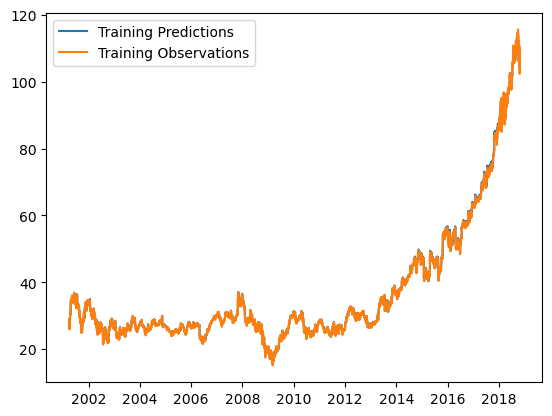

In [46]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Training Predictions','Training Observations'])

18/18 [==============================] - 0s 723us/step


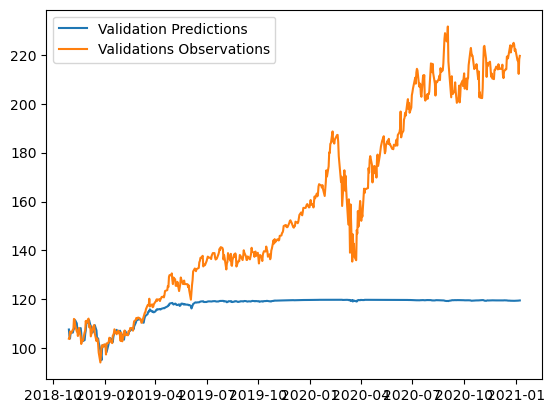

In [47]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['Validation Predictions','Validations Observations'])

18/18 [==============================] - 0s 728us/step


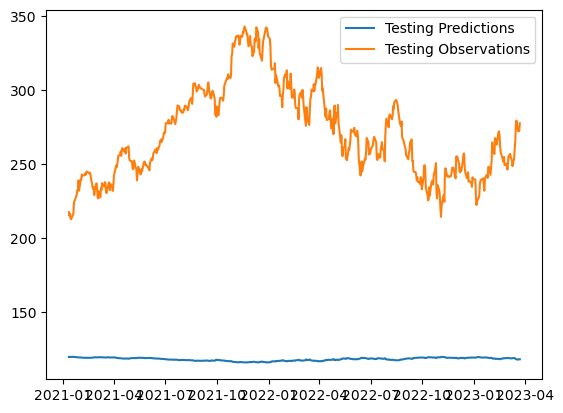

In [48]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Testing Predictions','Testing Observations'])

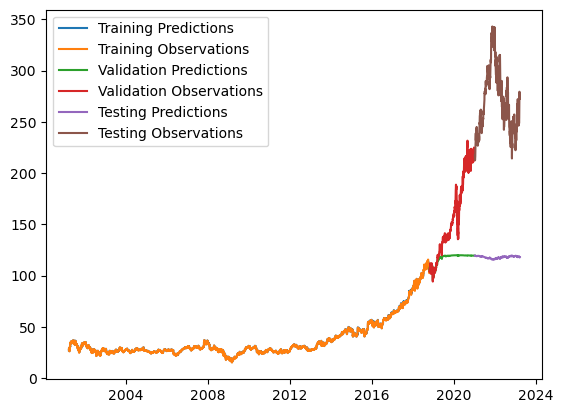

In [49]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])
# We can observe that LSTM models are very bad at extrapolating 
# Extrapolate : Learn data outside its range 

In [50]:
# Changing our window funcion
# Convert into a supervised learning problem
import numpy as np
# Converting a date into getting us 3 previous values and what it actually was
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-23', 
                                '2023-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-23,230.720001,230.350006,235.990005,237.580002
1,2021-03-24,230.350006,235.990005,237.580002,235.460007
2,2021-03-25,235.990005,237.580002,235.460007,232.339996
3,2021-03-26,237.580002,235.460007,232.339996,236.479996
4,2021-03-29,235.460007,232.339996,236.479996,235.240005
...,...,...,...,...,...
500,2023-03-17,260.790009,265.440002,276.200012,279.429993
501,2023-03-20,265.440002,276.200012,279.429993,272.230011
502,2023-03-21,276.200012,279.429993,272.230011,273.779999
503,2023-03-22,279.429993,272.230011,273.779999,272.290009


In [51]:
def windowed_df_to_date_X_y(windowed_dataframe):
    # Convert whole dataframe into numpy array
    df_As_np = windowed_dataframe.to_numpy()
    dates = df_As_np[:,0]
    
    # Getting the input matrix
    middle_matrix = df_As_np[:,1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))
    
    y = df_As_np[:,-1]
    
    return dates,X.astype(np.float32), y.astype(np.float32)

dates ,X,y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((505,), (505, 3, 1), (505,))

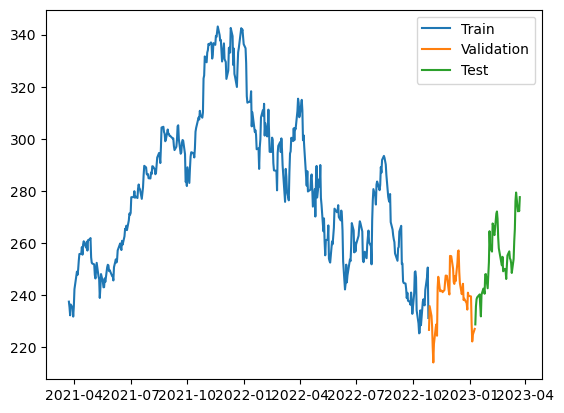

In [52]:
# Split data into train, validation and testing partitions
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train,y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                   layers.LSTM(64),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 35ms/step - loss: 79996.6719 - mean_absolute_error: 281.3569 - val_loss: 57282.5898 - val_mean_absolute_error: 239.1220
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 79626.1328 - mean_absolute_error: 280.6939 - val_loss: 56979.9102 - val_mean_absolute_error: 238.4884
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 79184.7031 - mean_absolute_error: 279.9094 - val_loss: 56503.3594 - val_mean_absolute_error: 237.4872
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 78500.7266 - mean_absolute_error: 278.6833 - val_loss: 55735.8203 - val_mean_absolute_error: 235.8653
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 77217.8516 - mean_absolute_error: 276.3718 - val_loss: 54161.4219 - val_mean_absolute_error: 232.5035
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 74848.3828 - mean_absolute_error: 272.0456 - val_lo

Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 55.5926 - mean_absolute_error: 5.5943 - val_loss: 35.2772 - val_mean_absolute_error: 4.4715
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 50.0397 - mean_absolute_error: 5.2748 - val_loss: 47.6454 - val_mean_absolute_error: 5.3641
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 52.4062 - mean_absolute_error: 5.5377 - val_loss: 32.3559 - val_mean_absolute_error: 4.2156
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 43.4111 - mean_absolute_error: 4.9421 - val_loss: 38.7329 - val_mean_absolute_error: 4.9814
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 47.1518 - mean_absolute_error: 5.3145 - val_loss: 37.6731 - val_mean_absolute_error: 4.8913
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 46.2467 - mean_absolute_error: 5.3148 - val_loss: 40.8186 - val_mean_absolute_error: 5.1466
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 31.1664 - mean_absolute_error: 4.4195 - val_loss: 59.4964 - val_mean_absolute_error: 6.5684
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 37.6749 - mean_absolute_error: 4.8641 - val_loss: 35.3860 - val_mean_absolute_error: 4.6531
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 33.7041 - mean_absolute_error: 4.5941 - val_loss: 29.7031 - val_mean_absolute_error: 4.0602


13/13 [==============================] - 1s 826us/step


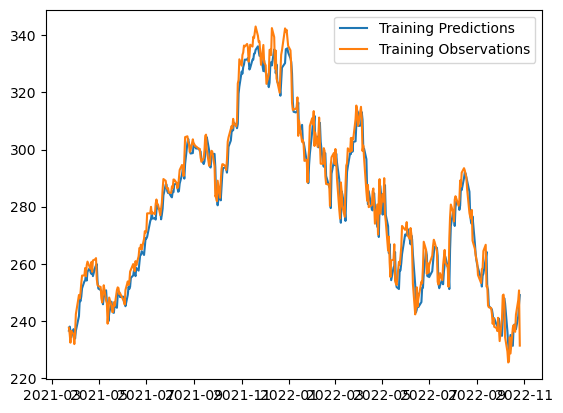

In [54]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Training Predictions','Training Observations'])

2/2 [==============================] - 0s 2ms/step


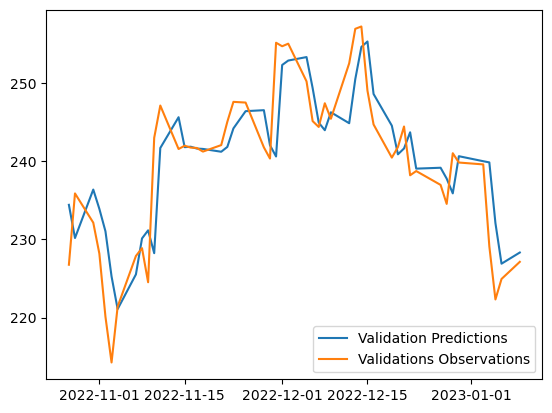

In [55]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['Validation Predictions','Validations Observations'])

2/2 [==============================] - 0s 2ms/step


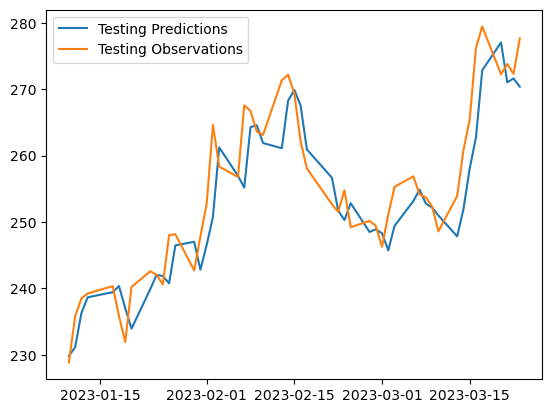

In [56]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Testing Predictions','Testing Observations'])

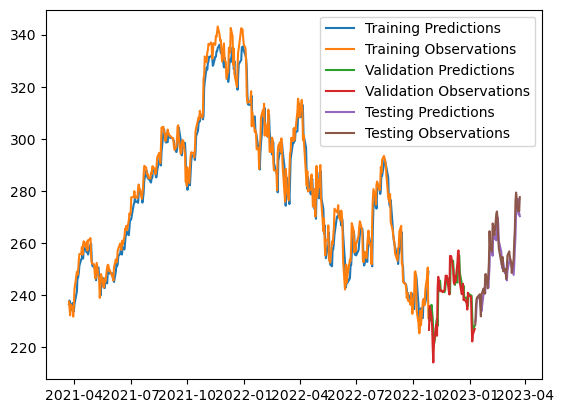

In [57]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])

In [58]:
# Let the model recursively predict the future and observe the results
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val,dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 12ms/step


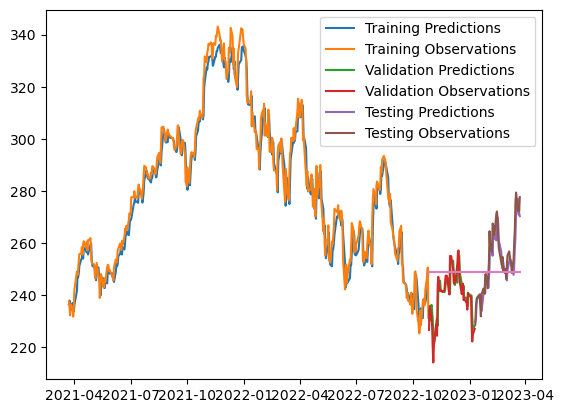

In [59]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.plot(recursive_dates,recursive_predictions)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])